In [81]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))
 
# # 7. Define model architecture
# model = Sequential()
 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
 
# # 8. Compile model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # 9. Fit the model
# model.fit(X_train, Y_train, 
#           batch_size=32, nb_epoch=10, verbose=1)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [30]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [31]:
print(score)

[0.047600643639185, 0.983]


In [129]:
# # Voor Belgie dataset:
# Combinatie van https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
# en van https://elitedatascience.com/keras-tutorial-deep-learning-in-python

# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import os,sys
from shutil import copyfile
import pandas as pd



# # Routine om de bestanden in te delen in test en trainings datasets volgens 80-20 principe
# for dirName, subdirList, fileList in os.walk('/Users/data/Lars/Belgie_verkeersborden_test/Train/'):
#     print('Found directory: %s' % dirName)
#     print(dirName.split("/")[-1])
#     for fname in fileList:
#         print('%s' % fname)
#         try:
#             if np.random.rand(1)>0.8:
#                 dest=os.path.join('/Users/data/Lars/test/Test/',dirName.split("/")[-1],fname)
#                 print(dest)
#                 copyfile(os.path.join(dirName,fname),dest)
#             else:
#                 dest=os.path.join('/Users/data/Lars/test/Train/',dirName.split("/")[-1],fname)
#                 print(os.path.join(dirName,fname),dest)
#                 copyfile(os.path.join(dirName,fname),dest)
#         except Exception as e: print(e)
# sys.exit()

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen=train_datagen.flow_from_directory(
        directory='/Users/data/Lars/test/Train/',
        target_size=(64, 64),
        batch_size=10,
        color_mode="rgb",
        class_mode="categorical",
#         save_to_dir='/Users/data/Lars/test/',
        shuffle=True,
        seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen=test_datagen.flow_from_directory(
        directory='/Users/data/Lars/test/Test/',
        target_size=(64, 64),
        batch_size=10,
        color_mode="rgb",
        class_mode="categorical",
#         save_to_dir='/Users/data/Lars/test/',
        shuffle=True,
        seed=42)

test_datagen=test_datagen.flow_from_directory(
        directory='/Users/data/Lars/test/Test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode=None,
#         save_to_dir='/Users/data/Lars/test/',
        shuffle=False,
        seed=42)




Found 5002 images belonging to 57 classes.
Found 1235 images belonging to 57 classes.
Found 1235 images belonging to 57 classes.


In [131]:
print(np.shape(test_datagen[-2]))
print(train_datagen[-1])

# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(64,64,3)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(57, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

STEP_SIZE_TRAIN=train_datagen.n//train_datagen.batch_size
STEP_SIZE_VALID=validation_datagen.n//validation_datagen.batch_size
model.fit_generator(generator=train_datagen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_datagen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)


(1, 64, 64, 3)
(array([], shape=(0, 64, 64, 3), dtype=float32), array([], shape=(0, 57), dtype=float32))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3...)`
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


Epoch 1/10
500/500 [==============================] - 327s 654ms/step - loss: 1.7788 - acc: 0.5734 - val_loss: 0.5329 - val_acc: 0.8980
Epoch 2/10
500/500 [==============================] - 326s 651ms/step - loss: 0.6457 - acc: 0.8272 - val_loss: 0.2697 - val_acc: 0.9206
Epoch 3/10
500/500 [==============================] - 326s 653ms/step - loss: 0.4543 - acc: 0.8704 - val_loss: 0.1781 - val_acc: 0.9506
Epoch 4/10
500/500 [==============================] - 328s 656ms/step - loss: 0.3419 - acc: 0.8948 - val_loss: 0.1402 - val_acc: 0.9571
Epoch 5/10
500/500 [==============================] - 324s 649ms/step - loss: 0.2786 - acc: 0.9106 - val_loss: 0.1356 - val_acc: 0.9579
Epoch 6/10
500/500 [==============================] - 326s 652ms/step - loss: 0.2397 - acc: 0.9228 - val_loss: 0.0973 - val_acc: 0.9741
Epoch 7/10
500/500 [==============================] - 326s 652ms/step - loss: 0.2201 - acc: 0.9330 - val_loss: 0.0841 - val_acc: 0.9765
Epoch 8/10
500/500 [============================

In [132]:
model.evaluate_generator(generator=validation_datagen)

test_datagen.reset()
pred=model.predict_generator(test_datagen,verbose=1)
print(pred)

predicted_class_indices=np.argmax(pred,axis=1)

1235/1235 [==============================] - 34s 28ms/step
[[9.9849331e-01 1.3396224e-03 3.0934852e-11 ... 2.0861944e-14
  1.4729604e-12 2.2394683e-16]
 [9.9329752e-01 6.2882383e-03 1.3606927e-10 ... 4.4129173e-14
  1.9744928e-11 1.2981812e-14]
 [3.5456696e-06 9.9981135e-01 9.4477615e-10 ... 1.9764485e-07
  6.4581474e-09 4.0796198e-08]
 ...
 [6.8887452e-24 1.1696160e-11 1.2229005e-22 ... 4.6988509e-14
  2.3075831e-15 1.0000000e+00]
 [1.9770930e-20 4.1190219e-08 2.0529351e-21 ... 1.6803504e-03
  2.3522609e-10 9.8051327e-01]
 [2.9564124e-23 5.9302850e-13 1.8190546e-21 ... 8.3901951e-15
  4.3790878e-16 1.0000000e+00]]


In [133]:
import pandas as pd
print(predicted_class_indices)
labels = (train_datagen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_datagen.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("/Users/data/Lars/results.csv",index=False)

[ 0  0  1 ... 56 56 56]


In [1]:
# # Voor Belgie dataset:
# Combinatie van https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
# en van https://elitedatascience.com/keras-tutorial-deep-learning-in-python

# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import os,sys
from shutil import copyfile
import pandas as pd


targetsize=32
resultfilename = '/Users/data/Lars/results'+str(targetsize)+'.csv'

# # Routine om de bestanden in te delen in test en trainings datasets volgens 80-20 principe
# for dirName, subdirList, fileList in os.walk('/Users/data/Lars/Belgie_verkeersborden_test/Train/'):
#     print('Found directory: %s' % dirName)
#     print(dirName.split("/")[-1])
#     for fname in fileList:
#         print('%s' % fname)
#         try:
#             if np.random.rand(1)>0.8:
#                 dest=os.path.join('/Users/data/Lars/test/Test/',dirName.split("/")[-1],fname)
#                 print(dest)
#                 copyfile(os.path.join(dirName,fname),dest)
#             else:
#                 dest=os.path.join('/Users/data/Lars/test/Train/',dirName.split("/")[-1],fname)
#                 print(os.path.join(dirName,fname),dest)
#                 copyfile(os.path.join(dirName,fname),dest)
#         except Exception as e: print(e)
# sys.exit()

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen=train_datagen.flow_from_directory(
        directory='/Users/data/Lars/test/Train/',
        target_size=(targetsize, targetsize),
        batch_size=10,
        color_mode="rgb",
        class_mode="categorical",
#         save_to_dir='/Users/data/Lars/test/',
        shuffle=True,
        seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen=test_datagen.flow_from_directory(
        directory='/Users/data/Lars/test/Test/',
        target_size=(targetsize, targetsize),
        batch_size=10,
        color_mode="rgb",
        class_mode="categorical",
#         save_to_dir='/Users/data/Lars/test/',
        shuffle=True,
        seed=42)

test_datagen=test_datagen.flow_from_directory(
        directory='/Users/data/Lars/test/Test/',
        target_size=(targetsize, targetsize),
        batch_size=1,
        class_mode=None,
#         save_to_dir='/Users/data/Lars/test/',
        shuffle=False,
        seed=42)

print(np.shape(test_datagen[-2]))
print(train_datagen[-1])

# 7. Define model architecture
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(targetsize,targetsize,3)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(57, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

STEP_SIZE_TRAIN=train_datagen.n//train_datagen.batch_size
STEP_SIZE_VALID=validation_datagen.n//validation_datagen.batch_size
model.fit_generator(generator=train_datagen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_datagen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

model.evaluate_generator(generator=validation_datagen)

test_datagen.reset()
pred=model.predict_generator(test_datagen,verbose=1)
print(pred)

predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

labels = (train_datagen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_datagen.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv(resultfilename,index=False)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 5002 images belonging to 57 classes.
Found 1235 images belonging to 57 classes.
Found 1235 images belonging to 57 classes.
(1, 32, 32, 3)
(array([], shape=(0, 32, 32, 3), dtype=float32), array([], shape=(0, 57), dtype=float32))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


Epoch 1/10
500/500 [==============================] - 74s 149ms/step - loss: 1.8393 - acc: 0.5596 - val_loss: 0.5690 - val_acc: 0.8696
Epoch 2/10
500/500 [==============================] - 76s 152ms/step - loss: 0.6399 - acc: 0.8316 - val_loss: 0.2564 - val_acc: 0.9239
Epoch 3/10
500/500 [==============================] - 74s 149ms/step - loss: 0.4134 - acc: 0.8834 - val_loss: 0.1586 - val_acc: 0.9595
Epoch 4/10
500/500 [==============================] - 75s 150ms/step - loss: 0.2778 - acc: 0.9166 - val_loss: 0.1128 - val_acc: 0.9652
Epoch 5/10
500/500 [==============================] - 74s 149ms/step - loss: 0.2303 - acc: 0.9284 - val_loss: 0.0975 - val_acc: 0.9757
Epoch 6/10
500/500 [==============================] - 76s 151ms/step - loss: 0.1945 - acc: 0.9426 - val_loss: 0.1052 - val_acc: 0.9700
Epoch 7/10
500/500 [==============================] - 75s 149ms/step - loss: 0.1578 - acc: 0.9456 - val_loss: 0.0760 - val_acc: 0.9814
Epoch 8/10
500/500 [==============================] - 7

In [1]:
def build(width, height, depth, classes):
    # initialize the model along with the input shape to be
    # "channels last" and the channels dimension itself
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    # if we are using "channels first", update the input shape
    # and channels dimension
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1

    # CONV => RELU => POOL layer set
    model.add(Conv2D(32, (3, 3), padding="same",
        input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # (CONV => RELU) * 2 => POOL layer set
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # (CONV => RELU) * 3 => POOL layer set
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model

def build2(targetsize,classes):
    # 7. Define model architecture
    model = Sequential()

    model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(targetsize,targetsize,3)))
    model.add(Conv2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))
    
#     # This block is added to the simple model
#     model.add(Conv2D(64, 3, 3, activation='relu'))
#     model.add(Conv2D(64, 3, 3, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    
    # return the model
    return model
 
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from imutils import paths
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os,sys

# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
#                 help="path to input dataset of images")
# ap.add_argument("-m", "--model", required=True,
#                 help="path to output trained model")
# ap.add_argument("-l", "--label-bin", required=True,
#                 help="path to output label binarizer")
# ap.add_argument("-p", "--plot", required=True,
#                 help="path to output accuracy/loss plot")
# args = vars(ap.parse_args())

dataset_path= Path('/Users/data/Lars/Belgie_verkeersborden_test/Train/')
dataset_path=Path('/Users/datalab1/Lars/Belgie_verkeersborden_test/Train')

# initialize the data and labels
print("[INFO] Loading images...")
data = []
labels = []
 
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset_path)))
imageTargetSize=64
random.seed(42)
random.shuffle(imagePaths)
 
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize it to 64x64 pixels (the required input
    # spatial dimensions of SmallVGGNet), and store the image in the
    # data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (imageTargetSize, imageTargetSize))
    data.append(image)
 
    # extract the class label from the image path and update the
    # labels list
    label = int(imagePath.split(os.path.sep)[-2])
    labels.append(label)    
print("[INFO] Done loading images...")

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY, trainPaths, testPaths) = train_test_split(data, labels,
                                                                         imagePaths, test_size=0.2, random_state=42)

print(np.shape(trainX))
print(np.shape(testX))
print(np.shape(trainY))
print(np.shape(testY))
print(np.shape(trainPaths))
print(np.shape(testPaths))

# convert the labels from integers to vectors (for 2-class, binary
# classification you should use Keras' to_categorical function
# instead as the scikit-learn's LabelBinarizer will not return a
# vector)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# print(np.shape(trainX))
# print(np.shape(trainY))
# print(np.shape(testX))
# print(np.shape(testY))
# print(lb.classes_)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")
 
# # initialize our VGG-like Convolutional Neural Network
# model = build(width=imageTargetSize, height=imageTargetSize, depth=3,
#                           classes=len(lb.classes_)) 

# initialize the same model as the cell above
model = build2(targetsize=imageTargetSize, classes=len(lb.classes_))

# initialize our initial learning rate, # of epochs to train for,
# and batch size
INIT_LR = 0.01
EPOCHS = 100
BS = 100
 
# initialize the model and optimizer (you'll want to use
# binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
opt='adam'
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
 
# train the network
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
                        validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
                        epochs=EPOCHS)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
 


C:\Users\datalab1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[INFO] Loading images...
[INFO] Done loading images...
(4989, 64, 64, 3)
(1248, 64, 64, 3)
(4989,)
(1248,)
(4989,)
(1248,)
[INFO] training network...


C:\Users\datalab1\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3...)`
C:\Users\datalab1\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


Epoch 1/100
49/49 [==============================] - 70s 1s/step - loss: 2.9374 - acc: 0.3088 - val_loss: 2.2595 - val_acc: 0.4359
Epoch 2/100
49/49 [==============================] - 69s 1s/step - loss: 1.8514 - acc: 0.5102 - val_loss: 1.3680 - val_acc: 0.6346
Epoch 3/100
49/49 [==============================] - 69s 1s/step - loss: 1.3836 - acc: 0.6116 - val_loss: 1.0256 - val_acc: 0.7155
Epoch 4/100
49/49 [==============================] - 69s 1s/step - loss: 1.1743 - acc: 0.6639 - val_loss: 0.7480 - val_acc: 0.8109
Epoch 5/100
49/49 [==============================] - 68s 1s/step - loss: 0.9796 - acc: 0.7140 - val_loss: 0.6610 - val_acc: 0.8133
Epoch 6/100
49/49 [==============================] - 69s 1s/step - loss: 0.8878 - acc: 0.7421 - val_loss: 0.5334 - val_acc: 0.8454
Epoch 7/100
49/49 [==============================] - 71s 1s/step - loss: 0.7599 - acc: 0.7747 - val_loss: 0.4818 - val_acc: 0.8462
Epoch 8/100
49/49 [==============================] - 76s 2s/step - loss: 0.7293 - a

49/49 [==============================] - 68s 1s/step - loss: 0.1204 - acc: 0.9587 - val_loss: 0.1143 - val_acc: 0.9679
Epoch 64/100
49/49 [==============================] - 68s 1s/step - loss: 0.1261 - acc: 0.9582 - val_loss: 0.0842 - val_acc: 0.9736
Epoch 65/100
49/49 [==============================] - 68s 1s/step - loss: 0.1361 - acc: 0.9570 - val_loss: 0.1068 - val_acc: 0.9760
Epoch 66/100
49/49 [==============================] - 69s 1s/step - loss: 0.1182 - acc: 0.9642 - val_loss: 0.0872 - val_acc: 0.9744
Epoch 67/100
49/49 [==============================] - 70s 1s/step - loss: 0.1217 - acc: 0.9619 - val_loss: 0.0843 - val_acc: 0.9792
Epoch 68/100
49/49 [==============================] - 68s 1s/step - loss: 0.1082 - acc: 0.9640 - val_loss: 0.1012 - val_acc: 0.9712
Epoch 69/100
49/49 [==============================] - 68s 1s/step - loss: 0.1197 - acc: 0.9627 - val_loss: 0.0790 - val_acc: 0.9792
Epoch 70/100
49/49 [==============================] - 68s 1s/step - loss: 0.1094 - acc: 0

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]
[32 22 47 40  1 35 37  9 54  1]
[32 22 47 40  1 35 37  9 54  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  8  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0
  0  0  0 -1]
['\\Users\\datalab1\\Lars\\Belgie_verkeersborden_test\\Train\\00032\\232.png', '\\Users\\datalab1\\Lars\\Belgie_verkeersborden_test\\Train\\00022\\7.png', '\\Users\\datalab1\\Lars\\Belgie_verkeersborden_test\\Train\\00047\\129.png', '\\Users\\datalab1\\Lars\\Belgie_verkeersborden_test\\Train\\00040\\218.png', '\\Users\\datalab1\\Lars\\Belgie_verkeersborden_test\\Train\\00001\\96.png', '\\Users\\datalab1\\Lars\\Belgie_verkeersborden_test\\Train\\00035\

C:\Users\datalab1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 57, does not match size of target_names, 174
  .format(len(labels), len(target_names))
C:\Users\datalab1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[INFO] serializing network and label binarizer...


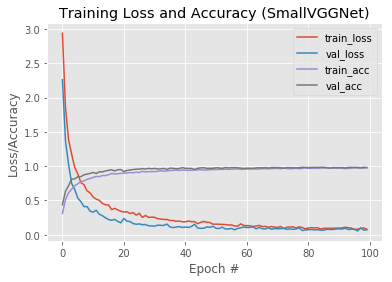

In [2]:
print(lb.classes_)

print(testY.argmax(axis=1)[:10])
print(predictions.argmax(axis=1)[:10])
diff=predictions.argmax(axis=1)-testY.argmax(axis=1)
print(diff[100:200])
print(testPaths[:10])
test=classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1), target_names=str(lb.classes_))
print(test[0])

print(classification_report(testY.argmax(axis=1),
                           predictions.argmax(axis=1), target_names=str(lb.classes_)))

# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(Path('/Users/datalab1/Lars/output/plot64x64.png'))

# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save(Path('/Users/datalab1/Lars/output/modelsimple64x64.model'))
f = open(Path('/Users/datalab1/Lars/output/modelsimple64x64.pickle'), "wb")
f.write(pickle.dumps(lb))
f.close()
